In [2]:
import warnings

warnings.filterwarnings("ignore")

from datetime import datetime
import itertools

import pandas as pd
import pandas_datareader.data as web
from pykalman import KalmanFilter
import pywt

import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
%cd ../../

d:\DS_Works\Quantitative\ML4AT-2nd


In [3]:
sns.set_style("whitegrid")
idx = pd.IndexSlice

In [6]:
DATA_STORE = "data/assets.h5"

In [7]:
with pd.HDFStore(DATA_STORE) as store:
    sp500 = store["sp500/stooq"].loc["2009":"2010", "close"]

## Kalman Filter 

### Configuration

In [8]:
kf = KalmanFilter(
    transition_matrices=[1],
    observation_matrices=[1],
    initial_state_mean=0,
    initial_state_covariance=1,
    observation_covariance=1,
    transition_covariance=0.01,
)

### Estimate the hidden state

In [9]:
state_means, _ = kf.filter(sp500)

### Compare with moving average

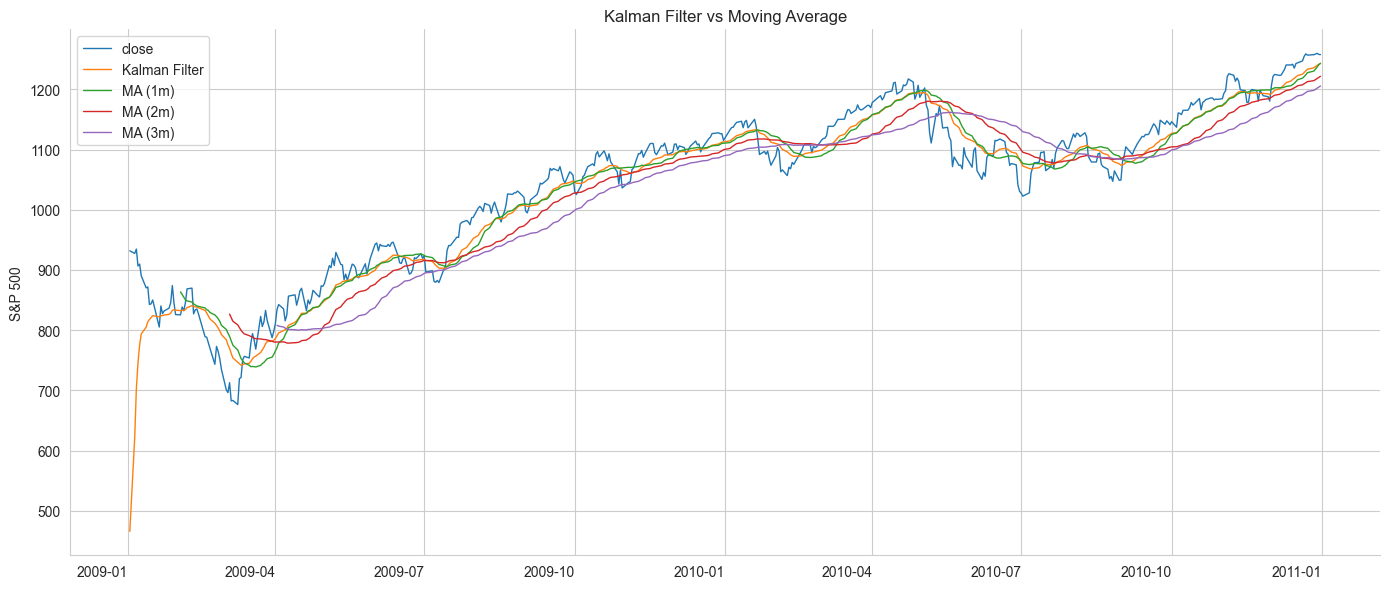

In [13]:
sp500_smoothed = sp500.to_frame("close")
sp500_smoothed["Kalman Filter"] = state_means
for months in [1, 2, 3]:
    sp500_smoothed[f"MA ({months}m)"] = sp500.rolling(
        window=months * 21
    ).mean()

ax = sp500_smoothed.plot(
    title="Kalman Filter vs Moving Average", figsize=(14, 6), lw=1, rot=0
)
ax.set_xlabel("")
ax.set_ylabel("S&P 500")
plt.tight_layout()
sns.despine()

## Wavelets

In [14]:
wavelet = pywt.Wavelet("db6")
phi, psi, x = wavelet.wavefun(level=5)